# **Contexto**

Dataset - 270 imagens do Homer e Bart, as imagens já estão com os nomes, facilitando o tratamento e treinamento da rede neural.

https://www.kaggle.com/juniorbueno/neural-networks-homer-and-bart-classification



## Importando as Libraries

In [24]:
import cv2           
import numpy as np
import os
import zipfile
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Extraindo as imagens

In [25]:
path = './homer_bart_1/'
directory = './homer_bart_1/'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['./homer_bart_1/bart1.bmp', './homer_bart_1/bart10.bmp', './homer_bart_1/bart100.bmp', './homer_bart_1/bart101.bmp', './homer_bart_1/bart102.bmp', './homer_bart_1/bart103.bmp', './homer_bart_1/bart104.bmp', './homer_bart_1/bart105.bmp', './homer_bart_1/bart106.bmp', './homer_bart_1/bart108.bmp', './homer_bart_1/bart109.bmp', './homer_bart_1/bart11.bmp', './homer_bart_1/bart110.bmp', './homer_bart_1/bart111.bmp', './homer_bart_1/bart112.bmp', './homer_bart_1/bart113.bmp', './homer_bart_1/bart114.bmp', './homer_bart_1/bart115.bmp', './homer_bart_1/bart116.bmp', './homer_bart_1/bart117.bmp', './homer_bart_1/bart118.bmp', './homer_bart_1/bart119.bmp', './homer_bart_1/bart12.bmp', './homer_bart_1/bart120.bmp', './homer_bart_1/bart121.bmp', './homer_bart_1/bart122.bmp', './homer_bart_1/bart123.bmp', './homer_bart_1/bart124.bmp', './homer_bart_1/bart125.bmp', './homer_bart_1/bart126.bmp', './homer_bart_1/bart127.bmp', './homer_bart_1/bart128.bmp', './homer_bart_1/bart13.bmp', './homer_bart_1

In [26]:
width, height = 128, 128  
images = []
classes = []  

for path_image in files:
  
  try:                             
    image = cv2.imread(path_image)
    (H, W) = image.shape[:2]        
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   


  window_name = 'image'
  # cv2.imshow(window_name, image)  
  # cv2.waitKey(0)
  # cv2.destroyAllWindows() 
  
  image = image.ravel()

  images.append(image)    
  name_image = os.path.basename(os.path.normpath(path_image))  
  #print(nome_imagem)
  if name_image.startswith('b'):                             
    classe = 0
  else:
    classe = 1

  classes.append(classe)
  # print(classe)

In [27]:
images

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [28]:
images[100], classes[100]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0)

In [29]:
images[200], classes[200]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 1)

In [31]:
type(images), type(classes)

(list, list)

In [33]:
X = np.asarray(images)   
Y = np.asarray(classes)

In [34]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [11]:
X.shape

(269, 16384)

In [35]:
Y.shape

(269,)

<Axes: ylabel='count'>

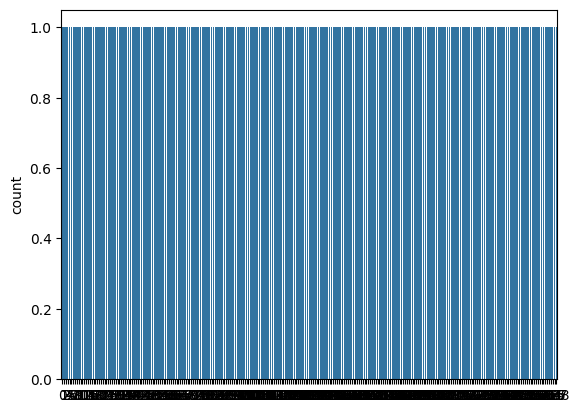

In [36]:
sns.countplot(Y)

In [37]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([160, 109], dtype=int64))

## Normalizaçao - Hexadecimal (255) para escala de 0 a 1

In [42]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [44]:
X[0].max(), X[0].min()   

(1.0, 0.0)

In [45]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

## Treinamento e Teste 20% split

In [46]:
X.shape

(269, 16384)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)  

In [48]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [49]:
X_test.shape, y_test.shape

((54, 16384), (54,))

## Construçao da topologia e treinamento da rede neural

In [50]:
128 * 128

16384

In [1]:
(16384 + 2) / 2

8193.0

In [56]:
# 16384 -> 8193 -> 8193
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu')) 
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [57]:
network1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_3 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_4 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
historic = network1.fit(X_train, y_train, epochs = 50)

Epoch 1/50


7/7 [==============================] - 8s 1s/step - loss: 147.8533 - accuracy: 0.4651
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 5.8999 - accuracy: 0.5581
Epoch 3/50
7/7 [==============================] - 7s 1s/step - loss: 3.5806 - accuracy: 0.4930
Epoch 4/50
7/7 [==============================] - 7s 1s/step - loss: 7.2895 - accuracy: 0.4930
Epoch 5/50
7/7 [==============================] - 7s 1s/step - loss: 1.1487 - accuracy: 0.5070
Epoch 6/50
7/7 [==============================] - 7s 1s/step - loss: 0.6662 - accuracy: 0.5907
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 0.9279 - accuracy: 0.5442
Epoch 8/50
7/7 [==============================] - 7s 1s/step - loss: 1.1744 - accuracy: 0.5860
Epoch 9/50
7/7 [==============================] - 7s 1s/step - loss: 1.5558 - accuracy: 0.5674
Epoch 10/50
7/7 [==============================] - 7s 1s/step - loss: 1.3091 - accuracy: 0.5395
Epoch 11/50
7/7 [============================

## Avaliaçao do modelo treinado

In [60]:
historic.history.keys()

dict_keys(['loss', 'accuracy'])

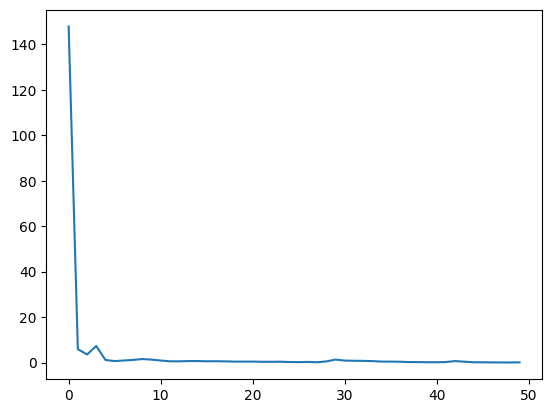

In [61]:
plt.plot(historic.history['loss'])

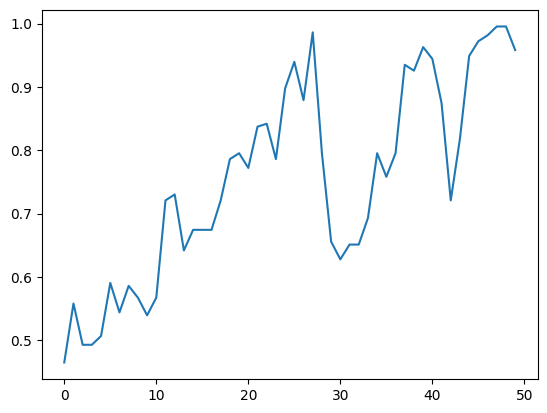

In [62]:
plt.plot(historic.history['accuracy'])

In [63]:
X_test.shape

(54, 16384)

In [64]:
forecasts = network1.predict(X_test)  
forecasts

2/2 [==============================] - 0s 44ms/step


array([[0.00319238],
       [0.96853596],
       [0.00608414],
       [0.01296287],
       [0.27054414],
       [0.00561943],
       [0.954448  ],
       [0.40618616],
       [0.0845121 ],
       [0.44126335],
       [0.01640792],
       [0.9992963 ],
       [0.39455327],
       [0.12499105],
       [0.02695029],
       [0.00432915],
       [0.02958954],
       [0.21829614],
       [0.00926296],
       [0.00467486],
       [0.00723419],
       [0.2704982 ],
       [0.00445787],
       [0.01961973],
       [0.014986  ],
       [0.16970497],
       [0.00452188],
       [0.00859568],
       [0.03116818],
       [0.83573794],
       [0.07956161],
       [0.98092985],
       [0.2179114 ],
       [0.00238104],
       [0.99811   ],
       [0.00369013],
       [0.07462381],
       [0.00644972],
       [0.03927408],
       [0.00195868],
       [0.62331486],
       [0.40678135],
       [0.02087098],
       [0.00687059],
       [0.00461948],
       [0.06381018],
       [0.6281164 ],
       [0.005

In [65]:
# 0 False Bart
# 1 True Homer
forecasts = (forecasts > 0.5)
forecasts

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [66]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forecasts)

0.6481481481481481

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forecasts)
cm

array([[27,  1],
       [18,  8]], dtype=int64)

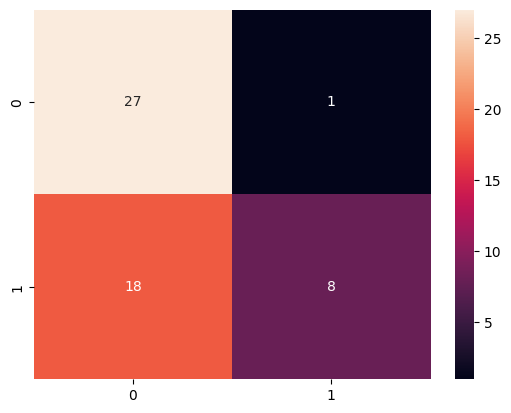

In [69]:
sns.heatmap(cm, annot=True);

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forecasts))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        28
           1       0.89      0.31      0.46        26

    accuracy                           0.65        54
   macro avg       0.74      0.64      0.60        54
weighted avg       0.74      0.65      0.60        54



## Classificaçao de apenas 1 imagem

In [71]:
X_test[0], y_test[0]   

(array([1., 1., 1., ..., 1., 1., 1.]), 0)

In [72]:
X_test[0].shape

(16384,)

In [83]:
cv2.imshow(window_name, (X_test[23].reshape(128,128))  )  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [84]:
image_test = X_test[23]  
image_test = scaler.inverse_transform(image_test.reshape(1, -1))
image_test

array([[1., 1., 1., ..., 1., 1., 1.]])

In [88]:
cv2.imshow(window_name, image_test.reshape(128,128))  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [86]:
network1.predict(image_test)[0][0]  

1/1 [==============================] - 0s 51ms/step


0.019619815

In [87]:
if network1.predict(image_test)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 50ms/step
Bart
